# Лабораторная работа №1. ДВПФ и ДПФ  
Курс: лаборатория цифровой обработки сигналов, ФРКТ МФТИ

# Модуль 2. Свойства ДПФ.

Свойства ДПФ. Циклический сдвиг последовательности и циклический сдвиг ДПФ. ДПФ как коэффициенты разложения по базису. Алгоритм Быстрого преобразования Фурье. 
```scipy.fft.fft(x, N)```



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
# Если используете Jupyter, то можно поменять backend
# %matplotlib notebook
# %matplotlib inline

## Формулы ДПФ анализа и синтеза
Пусть $x[k]$ — последовательность отсчетов сигнала либо длиной в $N$ отсчетов, либо периодическая с периодом $N$. Тогда прямое и обратное дискретное преобразование Фурье (ДПФ) последовательности $x[k]$ определяется следующим образом
$$X[n]=\sum\limits_{k=0}^{N-1}{x}[k]\exp \left( -j\frac{2\pi }{N}nk \right),$$
$$x[k]=\frac{1}{N}\sum\limits_{n=0}^{N-1}{X}[n]\exp \left( j\frac{2\pi }{N}nk \right).$$
Именно в таком виде ДПФ реализовано в Matlab, библиотеках Python Numpy  и Scipy.


---


Наряду с приведенной парой формул, существует запись ДПФ с нормирующем множителем $1/N$ в прямом преобразовании:
$$\tilde{X}[n]=\frac{1}{N}\sum\limits_{k=0}^{N-1}{x}[k]\exp \left( -j\frac{2\pi }{N}nk \right),$$
$$x[k]=\sum\limits_{n=0}^{N-1}{{\tilde{X}}}[n]\exp \left( j\frac{2\pi }{N}nk \right).$$


## Вычисление ДПФ по алгоритму Быстрого преобразования Фурье (FFT)

### ДПФ  без нормирующего множителя $1/N$
$$X[n]=\sum\limits_{k=0}^{N-1}{x}[k]\exp \left( -j\frac{2\pi }{N}nk \right)$$


Вычисление с помощью функции бибилиотеки ```NumPy```

In [3]:
x = np.array([1, 2, 3, 4, 5, 6, 7, 8])
np.fft.fft(x)

array([36.+0.j        , -4.+9.65685425j, -4.+4.j        , -4.+1.65685425j,
       -4.+0.j        , -4.-1.65685425j, -4.-4.j        , -4.-9.65685425j])

Вычисление с помощью аналогичной функции бибилиотеки ```SciPy```.

In [4]:
import scipy.fft
scipy.fft.fft(x)

array([36.-0.j        , -4.+9.65685425j, -4.+4.j        , -4.+1.65685425j,
       -4.-0.j        , -4.-1.65685425j, -4.-4.j        , -4.-9.65685425j])

```fft.ifft``` — функции для обратного преобразования (Inverse Fast Fourier Transform)



In [5]:
X = scipy.fft.fft(x)
n = np.arange(X.size)

print('n  = ', n)
print('X  = ', X)
print(np.fft.ifft(X))
print(scipy.fft.ifft(X))

n  =  [0 1 2 3 4 5 6 7]
X  =  [36.-0.j         -4.+9.65685425j -4.+4.j         -4.+1.65685425j
 -4.-0.j         -4.-1.65685425j -4.-4.j         -4.-9.65685425j]
[1.+0.j 2.+0.j 3.+0.j 4.+0.j 5.+0.j 6.+0.j 7.-0.j 8.+0.j]
[1.+0.j 2.+0.j 3.+0.j 4.+0.j 5.+0.j 6.+0.j 7.-0.j 8.+0.j]


Построение графика ДПФ.


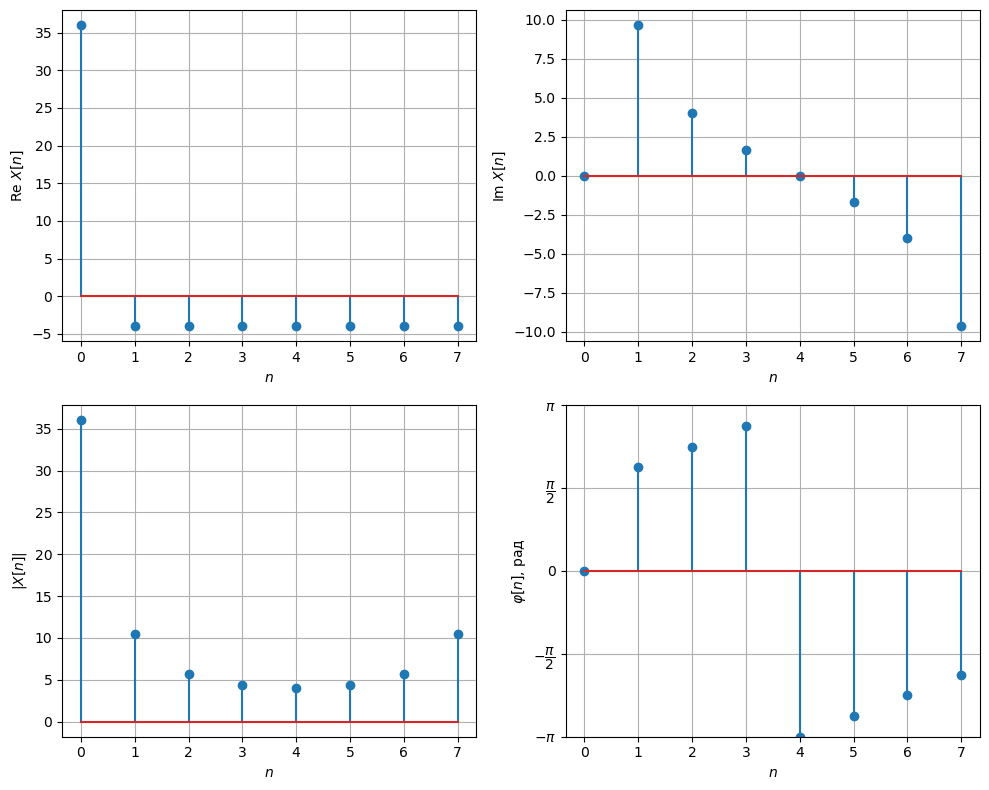

In [6]:
figure, axs = plt.subplots(2, 2, figsize=[10, 8], dpi=100)
axs[0, 0].stem(n, X.real)
axs[0, 0].set_ylabel('Re $X[n]$')

axs[0, 1].stem(n, X.imag)
axs[0, 1].set_ylabel('Im $X[n]$')

axs[1, 0].stem(n, abs(X))
axs[1, 0].set_ylabel('$|X[n]|$')

axs[1, 1].stem(n, np.angle(X))
axs[1, 1].set_ylabel('$\\varphi [n]$, рад')
axs[1, 1].set_yticks((-np.pi, -np.pi/2, 0, np.pi/2, np.pi))
axs[1, 1].set_yticklabels(("$-\\pi$", "$-\\dfrac{\\pi}{2}$", "0", "$\\dfrac{\\pi}{2}$", "$\\pi$"))
axs[1, 1].set_ylim((-np.pi, np.pi))

for ax in axs.flat:
    ax.set(xlabel='$n$')
    ax.xaxis.set_major_locator(ticker.MultipleLocator(base=1))
    ax.grid()
plt.tight_layout()

### ДПФ  c нормирующим множителем $1/N$


$$\tilde{X}[n]=\frac{1}{N}\sum\limits_{k=0}^{N-1}{x}[k]\exp \left( -j\frac{2\pi }{N}nk \right),$$

Вычисление с помощью функции бибилиотеки ```NumPy```

In [7]:
x = np.array([1, 2, 3, 4, 5, 6, 7, 8])
np.fft.fft(x)/x.size

array([ 4.5+0.j        , -0.5+1.20710678j, -0.5+0.5j       ,
       -0.5+0.20710678j, -0.5+0.j        , -0.5-0.20710678j,
       -0.5-0.5j       , -0.5-1.20710678j])

Вычисление с помощью функции бибилиотеки ```SciPy```.

In [8]:
import scipy.fft
scipy.fft.fft(x, norm='ortho')

array([12.72792206-0.j        , -1.41421356+3.41421356j,
       -1.41421356+1.41421356j, -1.41421356+0.58578644j,
       -1.41421356-0.j        , -1.41421356-0.58578644j,
       -1.41421356-1.41421356j, -1.41421356-3.41421356j])

* norm='forward'   $\tilde{X}[n]=\frac{1}{N}\sum\limits_{k=0}^{N-1}{x}[k]\exp \left( -j\frac{2\pi }{N}nk \right),$ $x[k]=\sum\limits_{n=0}^{N-1}{{\tilde{X}}}[n]\exp \left( j\frac{2\pi }{N}nk \right).$
* norm='backward'   ${X}[n]=\sum\limits_{k=0}^{N-1}{x}[k]\exp \left( -j\frac{2\pi }{N}nk \right),$ $x[k]=\frac{1}{N} \sum\limits_{n=0}^{N-1}{{{X}}}[n]\exp \left( j\frac{2\pi }{N}nk \right).$ --- по умолчанию
* norm='ortho'   $\bar{X}[n]=\frac{1}{\sqrt{N}} \sum\limits_{k=0}^{N-1}{x}[k]\exp \left( -j\frac{2\pi }{N}nk \right),$ $x[k]=\frac{1}{\sqrt{N}}\sum\limits_{n=0}^{N-1}{{\bar{X}}}[n]\exp \left( j\frac{2\pi }{N}nk \right).$

Примечание: все три номировки реализованы в SciPy начиная с версии 1.6.0


## Циклический сдвиг в ДПФ.

 Пусть $x[k]\overset{\text{ДПФ}}\longleftrightarrow X[n]$,  $y[k] \overset{\text{ДПФ}}\longleftrightarrow  Y[n]$, $Y[n]=X[n]\mathrm{e}^{-j\frac{2\pi}{N}nm}$, где $N$ — число отсчетов ДПФ, $m$ — число, на которое происходит сдвиг.
 
$$x[k]=\{ 0.1 \,\,\,\, 0.2 \,\,\,\, 0.5 \,\,\,\, 1 \}.$$

 Проведедите моделирование в Python. 
- Вычислите ДПФ $X[n]$ последовательности $x[k]$ (```fft(x)```).
- Получите последовательность отсчетов ДПФ $Y[n]$ путем домножения $X[n]$ на комплексную экспоенту $\mathrm{e}^{-j\frac{2\pi}{N}nm}$ (```np.exp(-1j*2*np.pi/4*m*n)```).
- Вычислите обратное ДПФ для $Y[n]$ (```ifft(Y)```).

In [9]:
x=np.array([0.1, 0.2, 0.5, 1])
x

array([0.1, 0.2, 0.5, 1. ])

In [10]:
X=np.fft.fft(x)
X

array([ 1.8+0.j , -0.4+0.8j, -0.6+0.j , -0.4-0.8j])

In [11]:
m=1
n=np.arange(4)
Y=X*np.exp(-1j*2*np.pi/4*m*n)
Y

array([1.8+0.00000000e+00j, 0.8+4.00000000e-01j, 0.6+7.34788079e-17j,
       0.8-4.00000000e-01j])

In [12]:
y=np.fft.ifft(Y)
y

array([1. +7.38808532e-17j, 0.1-4.61252776e-17j, 0.2-3.71414492e-17j,
       0.5+9.38587363e-18j])

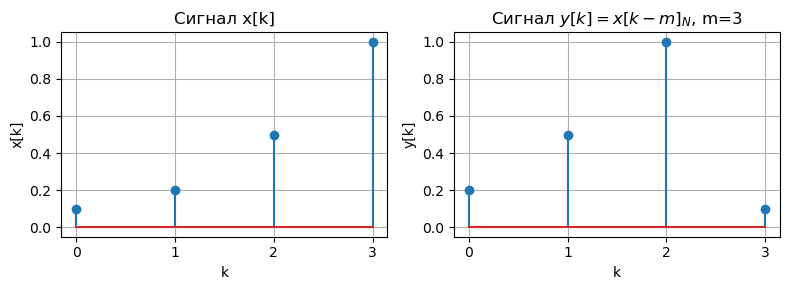

In [13]:
m=3
x=np.array([0.1, 0.2, 0.5, 1])
X=np.fft.fft(x)
n=np.arange(4)
Y=X*np.exp(-1j*2*np.pi/4*m*n)
y=np.fft.ifft(Y)

plt.figure(figsize=[8, 3], dpi=100)
plt.subplot(121)
plt.stem(x)
plt.xlabel("k")
plt.ylabel("x[k]")
plt.xticks(ticks=np.arange(x.size))
plt.title("Сигнал x[k]")
plt.grid()

plt.subplot(122)
plt.stem(y.real)
plt.xlabel("k")
plt.ylabel("y[k]")
plt.xticks(ticks=np.arange(x.size))
plt.title("Сигнал $y[k]=x[k-m]_N$, m=%i" %m)
plt.grid()

plt.tight_layout()

## Пример. Вычисление ДПФ.
Вычислим коэффициенты 16-точечного ДПФ $X[n]$ для последовательности отсчетов
$$
\begin{equation} 
x[k]=\left\{\begin{array}{l} \sin \left( \dfrac{2\pi}{N} r_0 k\right) ,\;0\leq k\leq N-1;\\0,\;\;\text{при других  } k.\end{array}\right.
\end{equation}
$$
при $r_0 = 3$ 
 * как коэффиценты разложения сигнала $x[k]$ по базису из комплексно-экспоненциальных функций  $\varphi_n[k]=\exp(j \dfrac{2\pi}{N} n k).$
 * с помощью функции ```fft```.



---



In [14]:
N=16
k = np.arange(0, N, 1)
x = np.sin(2*np.pi*3*k/N)
print("k = ", k)
print("x[k] = ",x)

k =  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
x[k] =  [ 0.00000000e+00  9.23879533e-01  7.07106781e-01 -3.82683432e-01
 -1.00000000e+00 -3.82683432e-01  7.07106781e-01  9.23879533e-01
  3.67394040e-16 -9.23879533e-01 -7.07106781e-01  3.82683432e-01
  1.00000000e+00  3.82683432e-01 -7.07106781e-01 -9.23879533e-01]


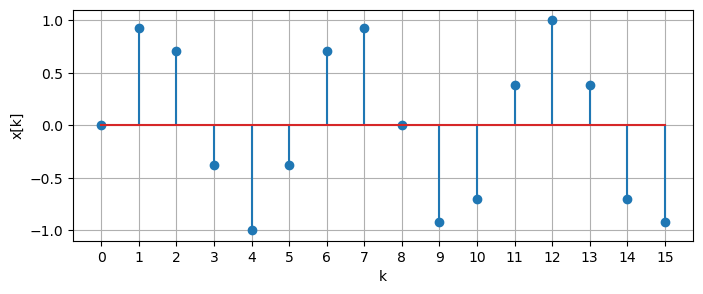

In [15]:
plt.figure(figsize=[8, 3], dpi=100)
plt.stem(k, x)
plt.xlabel("k")
plt.ylabel("x[k]")
plt.xticks(ticks=k)
plt.grid()
plt.show()

### Вычисление ДПФ по формуле прямого преобразования

$$X[n]=\sum_{k=0}^{N-1} x(k) \exp\left( -j  \dfrac{2 \pi}{N} nk\right)=$$
$$= \sum_{k=0}^{15} \sin\left(\dfrac{2 \pi}{16} 3k\right)  \exp\left( -j  \dfrac{2 \pi}{16} nk\right)=$$
$$= \sum_{k=0}^{15} \dfrac{1}{2j} \exp\left(j\dfrac{ 2 \pi}{16} 3k\right)  \exp\left( -j  \dfrac{2 \pi}{16} nk\right) - \dfrac{1}{2j} \exp\left(-j \dfrac{ 2 \pi}{16} 3k\right)  \exp\left( -j  \dfrac{2 \pi}{16} nk\right)=$$





$$=\dfrac{1}{2j} \sum_{k=0}^{15} \exp\left(-j\dfrac{ 2 \pi}{16} (n-3)k\right) - \exp\left(-j\dfrac{ 2 \pi}{16} (n+3)k\right) $$

Чтобы полностью определить ДПФ X(n), его нужно определить для $n=0,1,\dots, N-1.$

Рассморим отдельно сумму вида $S(m)=\sum_{k=0}^{N-1} \exp\left(-j\dfrac{ 2 \pi}{N} m k\right) $.

$$ \exp\left(-j\dfrac{ 2 \pi}{N} m k\right) = \cos\left(\dfrac{ 2 \pi}{N} m k\right) - j \sin \left(\dfrac{ 2 \pi}{N} m k\right)$$


---


Если $m$ равно нулю или кратно N, то 

$S(m)=\sum_{k=0}^{N-1} 1 = N.$


---



Если $m$ не равно 0 и не кратно N, то воспользуемся формулой суммы $N$ элементов геометрической прогрессии 
$$ S_N = b_1 \dfrac{1-q^N}{1-q}$$
где $q=\exp\left(-j\dfrac{ 2 \pi}{N} m \right)$, $b_1=\exp(0)=e^0=1$.

$S(m)=\sum_{k=0}^{N-1} \exp\left(-j\dfrac{ 2 \pi}{N} m k\right)= \dfrac{1-\exp\left(-j{ 2 \pi} m \right)}{1-\exp\left(-j\dfrac{ 2 \pi}{N} m \right)} = 0 $


---





$$\tilde{X}[n]=\dfrac{1}{2j} \sum_{k=0}^{15} \exp\left(-j\dfrac{ 2 \pi}{16} (n-3)k\right) - \exp\left(-j\dfrac{ 2 \pi}{16} (n+3)k\right) $$

| X[0] | X[1] | X[2] |  X[3] | X[4] | X[5] | X[6] | X[7] | X[8] | X[9] | X[10] | X[11] | X[12] | X[13] | X[14] | X[15] |
|:----:|:----:|:----:|:-----:|:----:|:----:|:----:|:----:|:----:|:----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|
|   0  |   0  |   0  | -8j |   0  |   0  |   0  |   0  |   0  |   0  |   0   |   0   |   0   |  8j |   0   |   0   |




### Вычисление с помощью функции `fft`

In [16]:
X=np.fft.fft(x)
for u in range(N):
    print("X[%i]=%0.1f + %0.1f j" %(u, X[u].real, X[u].imag))

X[0]=-0.0 + 0.0 j
X[1]=0.0 + 0.0 j
X[2]=0.0 + 0.0 j
X[3]=-0.0 + -8.0 j
X[4]=0.0 + -0.0 j
X[5]=0.0 + 0.0 j
X[6]=0.0 + -0.0 j
X[7]=0.0 + 0.0 j
X[8]=-0.0 + 0.0 j
X[9]=0.0 + -0.0 j
X[10]=0.0 + 0.0 j
X[11]=0.0 + -0.0 j
X[12]=0.0 + 0.0 j
X[13]=-0.0 + 8.0 j
X[14]=0.0 + -0.0 j
X[15]=0.0 + -0.0 j


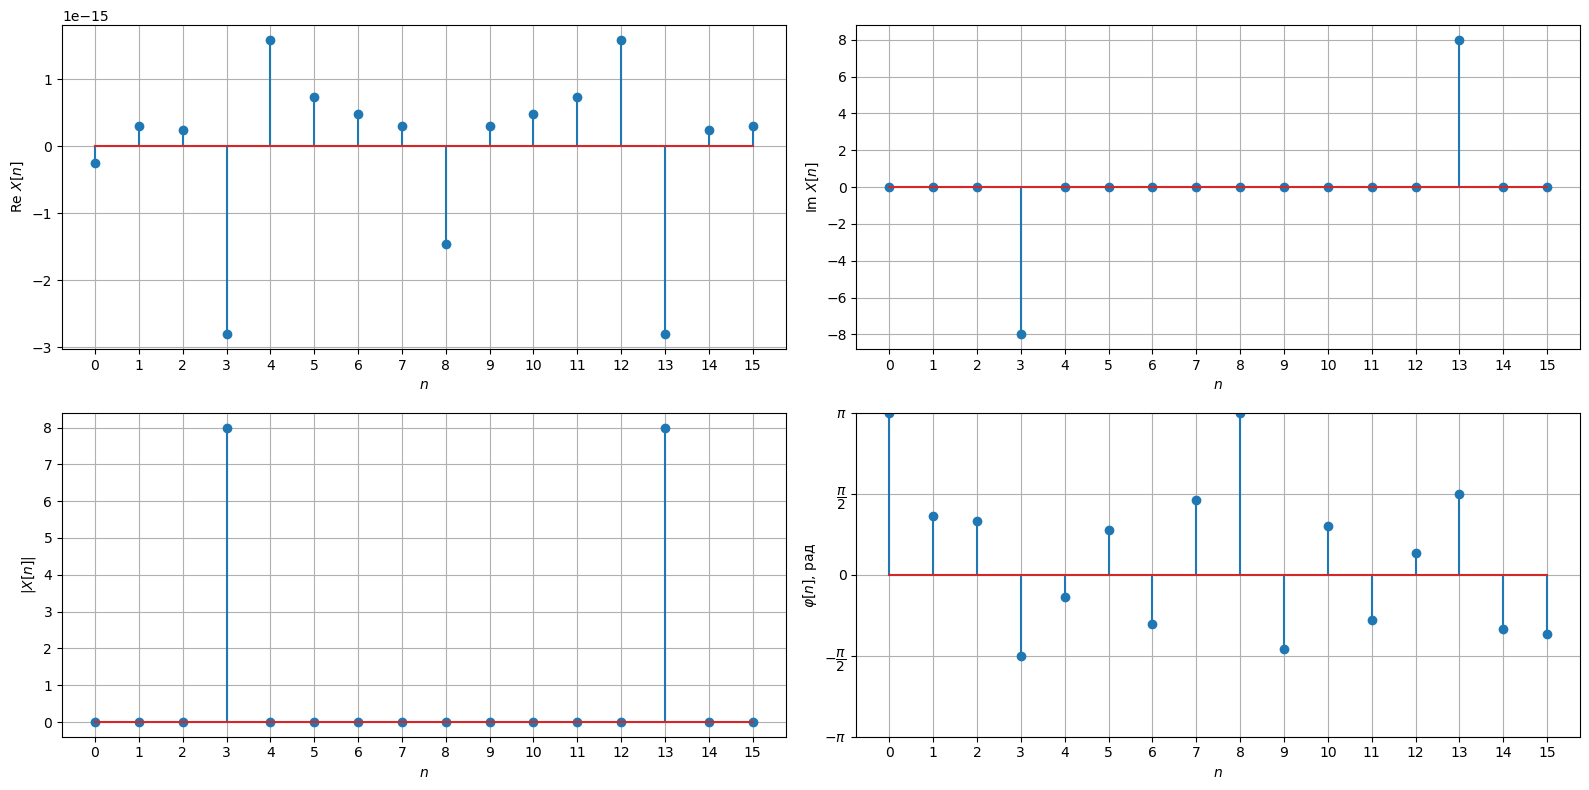

In [17]:
figure, axs = plt.subplots(2, 2, figsize=[16, 8])
n=np.arange(X.size)
axs[0, 0].stem(n, X.real)
axs[0, 0].set_ylabel('Re $X[n]$')

axs[0, 1].stem(n, X.imag)
axs[0, 1].set_ylabel('Im $X[n]$')

axs[1, 0].stem(n, abs(X))
axs[1, 0].set_ylabel('$|X[n]|$')
axs[1, 1].stem(n, np.angle(X))

axs[1, 1].set_ylabel('$\\varphi [n]$, рад')
axs[1, 1].set_yticks((-np.pi, -np.pi/2, 0, np.pi/2, np.pi))
axs[1, 1].set_yticklabels(("$-\\pi$", "$-\\dfrac{\\pi}{2}$", "0", "$\\dfrac{\\pi}{2}$", "$\\pi$"))
axs[1, 1].set_ylim((-np.pi, np.pi))

for ax in axs.flat:
    ax.set(xlabel='$n$')
    ax.xaxis.set_major_locator(ticker.MultipleLocator(base=1))
    ax.grid()
plt.tight_layout()

Заметим, что ненулевая действительная часть коффициэнтов ДПФ обусловена **только точностью вычислений** (порядок $10^{-16}$)

### ДПФ как коэфициенты разложения по базису

Вычислите коэффициенты 16-точечного ДПФ $X[n]$ для последовательности отсчетов
$$
\begin{equation} 
x[k]=\left\{\begin{array}{l} \sin \left( \dfrac{2\pi}{N} r_0 k\right) ,\;0\leq k\leq N-1;\\0,\;\;\text{при других  } k.\end{array}\right.
\end{equation}
$$
при $r_0 = 3$ с помощью
 * как коэффиценты разложения сигнала $x[k]$ по базису из комплексно-экспоненциальных функций  $\varphi_n[k]=\exp(j \dfrac{2\pi}{N} n k)$

Для $k=0, 1, \dots, N-1$
$$x[k]=\sum_{k=0}^{N-1} \tilde{X}[n] \varphi_n[k]=\sum_{k=0}^{N-1} \tilde{X}[n] \exp(j \dfrac{2\pi}{N} n k)$$

$\sin \left(\dfrac{ 2 \pi}{16} 3k\right) = \dfrac{1}{2j} \exp\left(j\dfrac{ 2 \pi}{16} 3k\right) - \dfrac{1}{2j} \exp\left(-j\dfrac{ 2 \pi}{16} 3k\right)= $ $\left[ \dfrac{1}{j} = -j\right]$

$=-\dfrac{j}{2} \exp\left(j\dfrac{ 2 \pi}{16} 3k\right) + \dfrac{j}{2} \exp\left(-j\dfrac{ 2 \pi}{16} 3k\right)$

$=-\dfrac{j}{2} \exp\left(j\dfrac{ 2 \pi}{16} 3k\right) + \dfrac{j}{2} \exp\left(j2\pi k-j\dfrac{ 2 \pi}{16} 3k\right)$

$=-\dfrac{j}{2} \exp\left(j\dfrac{ 2 \pi}{16} 3k\right) + \dfrac{j}{2} \exp\left(j\dfrac{ 2 \pi}{16} 13k\right)$


Для $k=0, 1, \dots, N-1$
$$x[k]=\sum_{k=0}^{N-1} \tilde{X}[n] \varphi_n(k)=\sum_{k=0}^{N-1} \tilde{X}[n] \exp(j \dfrac{2\pi}{N} n k)=-\dfrac{j}{2} \exp\left(j\dfrac{ 2 \pi}{16} 3k\right) + \dfrac{j}{2} \exp\left(j\dfrac{ 2 \pi}{16} 13k\right)$$

Получаем, что $\tilde{X}[3]=-0.5j$, $\tilde{X}[13]=0.5j$, а остальные значения на периоде $[0, \;N-1]$ нулевые. Используя связь коэффициентов 
ДПФ с нормировкой и без ($\tilde{X}[n]=\dfrac1N {X}[n]$), получаем

| X[0] | X[1] | X[2] |  X[3] | X[4] | X[5] | X[6] | X[7] | X[8] | X[9] | X[10] | X[11] | X[12] | X[13] | X[14] | X[15] |
|:----:|:----:|:----:|:-----:|:----:|:----:|:----:|:----:|:----:|:----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|
|   0  |   0  |   0  | -8j |   0  |   0  |   0  |   0  |   0  |   0  |   0   |   0   |   0   |  8j |   0   |   0   |



### Вычисление с помощью теоремы смещения для ДПФ 

Вычислите коэффициенты 16-точечного ДПФ $X(n)$ для последовательности отсчетов
$$
\begin{equation} 
x[k]=\left\{\begin{array}{l} -\dfrac{j}{2} \exp\left(j\dfrac{ 2 \pi}{16} 3k\right) + \dfrac{j}{2} \exp\left(j\dfrac{ 2 \pi}{16} 13k\right) ,\;0\leq k\leq N-1;\\0,\;\;\text{при других  } k.\end{array}\right.
\end{equation}
$$

Рассмотрим сигнал 
$$
\begin{equation} 
w[k]= \sum_{m=0}^{N-1} \mathbf{1}[k-m]=\left\{\begin{array}{l} 1 ,\;0\leq k\leq N-1;\\0,\;\;\text{при других  } k.\end{array}\right.
\end{equation}
$$

$$x[k]= -\dfrac{j}{2} \exp\left(j\dfrac{ 2 \pi}{16} 3k\right) w[k] + \dfrac{j}{2} \exp\left(j\dfrac{ 2 \pi}{16} 13k\right) w[k]$$

Для него ДПФ 
$$W[n]= \sum_{k=0}^{N-1}  \exp\left( -j  \dfrac{2 \pi}{N} nk\right).$$



| W[0] | W[1] | W[2] |  W[3] | W[4] | W[5] | W[6] | W[7] | W[8] | W[9] | W[10] | W[11] | W[12] | W[13] | W[14] | W[15] |
|:----:|:----:|:----:|:-----:|:----:|:----:|:----:|:----:|:----:|:----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|
|   16  |   0  |   0  | 0 |   0  |   0  |   0  |   0  |   0  |   0  |   0   |   0   |   0   |  0 |   0   |   0   |



Используем теорему смещения для ДПФ:
Если ДПФ для последовательности $y[k]$ будет $Y[n]$, то
для $y[k]\exp\left( \pm j \dfrac{2\pi}{N} n_0 k \right)$ ДПФ $Y[n \mp n_0]_N$. Также воспользуемся свойством линейности ДПФ.





$\tilde{X}[n]=-\dfrac{j}{2}W[n-3]_N+\dfrac{j}{2}W[n-13]_N$




| X[0] | X[1] | X[2] |  X[3] | X[4] | X[5] | X[6] | X[7] | X[8] | X[9] | X[10] | X[11] | X[12] | X[13] | X[14] | X[15] |
|:----:|:----:|:----:|:-----:|:----:|:----:|:----:|:----:|:----:|:----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|
|   0  |   0  |   0  | -8j |   0  |   0  |   0  |   0  |   0  |   0  |   0   |   0   |   0   |  8j |   0   |   0   |

